In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbody import Particles, NBodySimulator
from nbody import load_files, save_movie
from numba import set_num_threads
from numba import jit, prange, njit


In [2]:
# Uncomment the following line to install required packages if needed

#!conda install -y -c conda-forge ffmpeg, glob, numba

# N-Body Simulation

In this notebook, we will test the `NBodySimulator` class in `./nbody/simulator.py`. 

In [2]:
# Set the number of threads to use for numba
nthreads = 1
set_num_threads(nthreads)

# Exercise 1: The Sun-Earth System

The first test is to implment the Sun-Earth system, which is a two body system. We need to make sure that you could simulate a circular motion first.

## Step 1. The initial condition

Copy the initial condition of the Earth-Sun system from `project2_demo1.ipynb`.

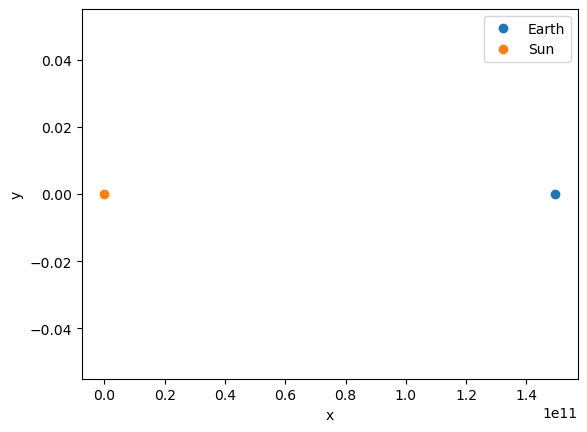

In [3]:
# TODO:

sun_mass = 1.989e30 # kg
earth_mass = 5.972e24 # kg
separation = 1.496e11 # m
period = 3.154e7 # s
r_sun = separation * earth_mass / (sun_mass + earth_mass)
r_earth = separation * sun_mass / (sun_mass + earth_mass)
vy_sun = 2 * np.pi * r_sun / period
vy_earth = 2 * np.pi * r_earth / period

# create the system, pts is an instance of the Particles class
pts = Particles(N=2)
pts.masses = np.array([[sun_mass], [earth_mass]])
pts.positions = np.array([[-r_sun, 0, 0], [r_earth, 0, 0]])
pts.velocities = np.array([[0, -vy_sun, 0], [0, vy_earth, 0]])
pts.accelerations = np.zeros((2, 3))
pts.tags = np.array([1, 2])

# visualize the system
plt.figure()
plt.plot(pts.positions[1, 0], pts.positions[1, 1], 'o', label='Earth')
plt.plot(pts.positions[0, 0], pts.positions[0, 1], 'o', label='Sun')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Step 2. N-body simulation

Make sure you have implmented the below two methods `setup()` and `evolve()`. Run the n-body simulation by:

In [4]:
simulation = NBodySimulator(particles=pts)
simulation.setup(G=6.674e-11,rsoft=1e9,method='RK4', io_freq=30)
simulation.evolve(dt=8640, tmax=365*86400)

n= 0 Time:  0  dt:  8640
n= 30 Time:  259200  dt:  8640
n= 60 Time:  518400  dt:  8640
n= 90 Time:  777600  dt:  8640
n= 120 Time:  1036800  dt:  8640
n= 150 Time:  1296000  dt:  8640
n= 180 Time:  1555200  dt:  8640
n= 210 Time:  1814400  dt:  8640
n= 240 Time:  2073600  dt:  8640
n= 270 Time:  2332800  dt:  8640
n= 300 Time:  2592000  dt:  8640
n= 330 Time:  2851200  dt:  8640
n= 360 Time:  3110400  dt:  8640
n= 390 Time:  3369600  dt:  8640
n= 420 Time:  3628800  dt:  8640
n= 450 Time:  3888000  dt:  8640
n= 480 Time:  4147200  dt:  8640
n= 510 Time:  4406400  dt:  8640
n= 540 Time:  4665600  dt:  8640
n= 570 Time:  4924800  dt:  8640
n= 600 Time:  5184000  dt:  8640
n= 630 Time:  5443200  dt:  8640
n= 660 Time:  5702400  dt:  8640
n= 690 Time:  5961600  dt:  8640
n= 720 Time:  6220800  dt:  8640
n= 750 Time:  6480000  dt:  8640
n= 780 Time:  6739200  dt:  8640
n= 810 Time:  6998400  dt:  8640
n= 840 Time:  7257600  dt:  8640
n= 870 Time:  7516800  dt:  8640
n= 900 Time:  7776000  d

## Step 3. Visualization

Check the code in `./nobdy/visualization.py`.
Data loader is implmented in the function `load_files`.

In [5]:
fns = load_files('nbody')
print(fns)

['data_nbody/nbody_000000.dat', 'data_nbody/nbody_000030.dat', 'data_nbody/nbody_000060.dat', 'data_nbody/nbody_000090.dat', 'data_nbody/nbody_000120.dat', 'data_nbody/nbody_000150.dat', 'data_nbody/nbody_000180.dat', 'data_nbody/nbody_000210.dat', 'data_nbody/nbody_000240.dat', 'data_nbody/nbody_000270.dat', 'data_nbody/nbody_000300.dat', 'data_nbody/nbody_000330.dat', 'data_nbody/nbody_000360.dat', 'data_nbody/nbody_000390.dat', 'data_nbody/nbody_000420.dat', 'data_nbody/nbody_000450.dat', 'data_nbody/nbody_000480.dat', 'data_nbody/nbody_000510.dat', 'data_nbody/nbody_000540.dat', 'data_nbody/nbody_000570.dat', 'data_nbody/nbody_000600.dat', 'data_nbody/nbody_000630.dat', 'data_nbody/nbody_000660.dat', 'data_nbody/nbody_000690.dat', 'data_nbody/nbody_000720.dat', 'data_nbody/nbody_000750.dat', 'data_nbody/nbody_000780.dat', 'data_nbody/nbody_000810.dat', 'data_nbody/nbody_000840.dat', 'data_nbody/nbody_000870.dat', 'data_nbody/nbody_000900.dat', 'data_nbody/nbody_000930.dat', 'data_n

Modify the matplotlib script 

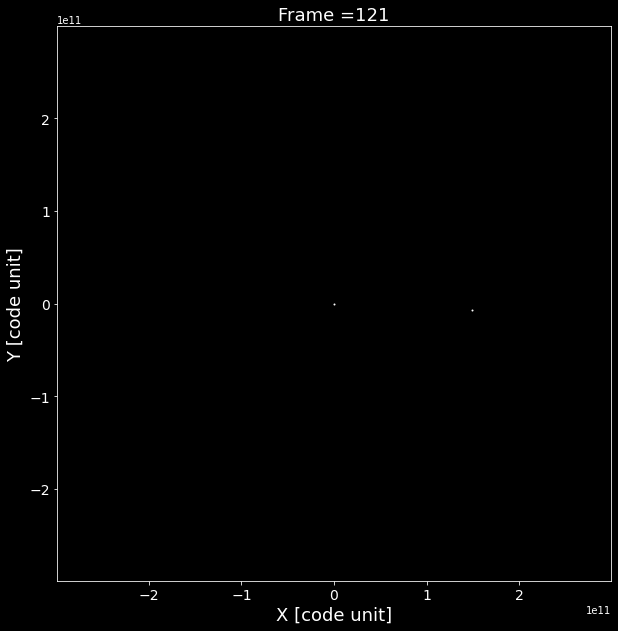

In [6]:
au = 1.496e11
save_movie(fns, lengthscale=2*au,filename='nbody_earth_sun.mp4', fps=10)

# Exercise 2: N-Body simulation

Now, let's test our n-body solver with more particles. Copy the initial condition from the Exercise 2 in `project2_demo1.ipynb`.

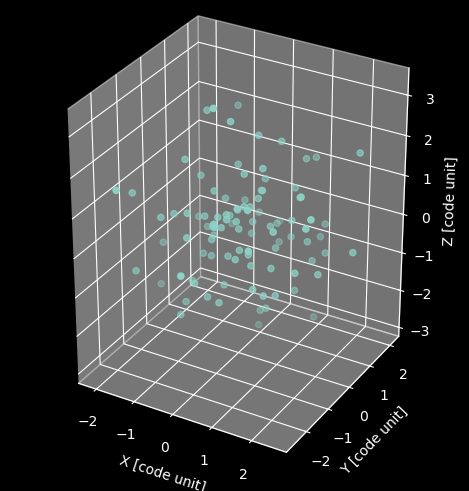

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X [code unit]', ylabel='Y [code unit]', zlabel='Z [code unit]'>)

In [7]:
# TODO
num_particles = 100
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 10/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

# visualize the system
pts.draw(dim=3)

## Step 2. Simulation.

Visualize the system but use dimensionless units. Set `G=1` and `rsoft=0.001`.

In [8]:
simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,rsoft=0.001,method='RK4', io_freq=10, io_header='cluster')
simulation.evolve(dt=0.01, tmax=1)

n= 0 Time:  0  dt:  0.01
n= 10 Time:  0.09999999999999999  dt:  0.01
n= 20 Time:  0.20000000000000004  dt:  0.01
n= 30 Time:  0.3000000000000001  dt:  0.01
n= 40 Time:  0.4000000000000002  dt:  0.01
n= 50 Time:  0.5000000000000002  dt:  0.01
n= 60 Time:  0.6000000000000003  dt:  0.01
n= 70 Time:  0.7000000000000004  dt:  0.01
n= 80 Time:  0.8000000000000005  dt:  0.01
n= 90 Time:  0.9000000000000006  dt:  0.01
Simulation is done!


It is VERY slow !!!!

Beacuse the accerlation calculations requires order of NxN calculations!
Could we improve it?

First, we should avoid the two "for" loops in the calculation using python.\
Second, we have many cup cores in our machine. Could we parallelize it?

# `numba`

Step 1. Take out the function to calculate the accerlation from the class into a pure function that only counts math calculations (aka. a kernel).

Step 2. Use the `numba`'s `@jit` micro. 

Results: In my experiments. I got roughly x140 speed up with the @jit(nopython=True). 

Step 3. Try using `@njit` and `prange` in numba.

## Performance

### Strong Scaling Test

**Strong scaling**: The number of processors is increased while the problem size remains constant.\
We could use `%timeit` to measure the performance. Let's run 1000 particles for 10 step.

In [9]:
num_particles = 1000
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 10/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,rsoft=0.001,method='RK4', io_screen=False, io_freq=0, io_header='cluster')
#simulation.evolve(dt=0.02, tmax=1)

In [10]:
%timeit simulation.evolve(dt=0.02, tmax=0.2)

Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
3.93 s ± 61.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Mine**
* Apple M2 macbook air/ 8 cores CPU/ 8 cores GPU

* thread = 1: 3.79 s ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* thread = 2: 2.91 s ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* thread = 3: 2.71 s ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* thread = 6: 1.64 s ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* thread = 8: 1.16 s ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

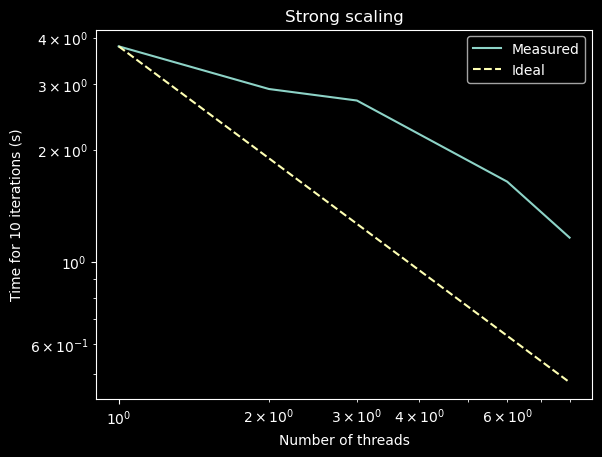

In [11]:
threads = [1,2,3,6,8]                     # Replace it to your measured values
times = [3.79, 2.91, 2.71, 1.64, 1.16] # Replace it to your measured values
ideal = times[0]/np.array(threads)
plt.loglog(threads, times)
plt.loglog(threads, ideal, '--')
plt.xlabel('Number of threads')
plt.ylabel('Time for 10 iterations (s)')
plt.legend(['Measured', 'Ideal'])
plt.title('Strong scaling')
plt.show()

## Weak Scaling Test

In N-body simulation, the problem size is proportional to $N^2$.\
**Weaking scaling** test measures the scaling with the same problem size per thread (core).

In [12]:
num_particles = int(225*np.sqrt(nthreads))
print("N =", num_particles, ", threads = ", nthreads)
pts = Particles(N=num_particles)
pts.masses = np.ones((num_particles, 1))* 10/num_particles
pts.positions = np.random.randn(num_particles, 3)
pts.velocities = np.random.randn(num_particles, 3)
pts.accelerations = np.zeros((num_particles, 3))

simulation = NBodySimulator(particles=pts)
simulation.setup(G=1,rsoft=0.001,method='RK4', io_screen=False, io_freq=0, io_header='cluster')

N = 225 , threads =  1


In [13]:
%timeit simulation.evolve(dt=0.02, tmax=0.2)

Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
Simulation is done!
200 ms ± 6.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


mine
* N = 225 threads =  1: 194 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* N = 450 threads =  4:370 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* N = 636 threads =  8:489 ms ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

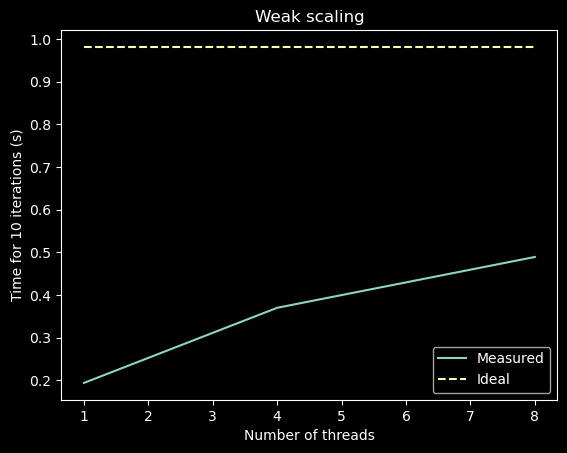

In [15]:
threads = [1,4,8]                     # Replace it to your measured values
times = [0.194, 0.370, 0.489] # Replace it to your measured values
ideal = 0.981 * np.ones(len(threads))
plt.plot(threads, times)
plt.plot(threads, ideal, '--')
plt.xlabel('Number of threads')
plt.ylabel('Time for 10 iterations (s)')
plt.legend(['Measured', 'Ideal'])
plt.title('Weak scaling')
plt.show()